In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('imgs/log.csv')
data["FlatWeights"] = data["FlatWeights"].apply(lambda s: [float(si) for si in s.split(":")])
data.head()

,Generation,BestEval,FlatWeights
0,1,0.318162,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,100,0.743531,"[0.0042, 0.0096, -0.007, 0.0009, -0.0088, 0.0,..."
2,200,1.023361,"[0.0098, 0.0113, -0.0096, -0.0012, -0.0124, 0...."
3,300,1.410445,"[0.0113, 0.0132, -0.0096, 0.0052, -0.0124, 0.0..."
4,400,1.926504,"[0.0149, 0.0202, -0.0045, 0.0087, -0.0208, 0.0..."


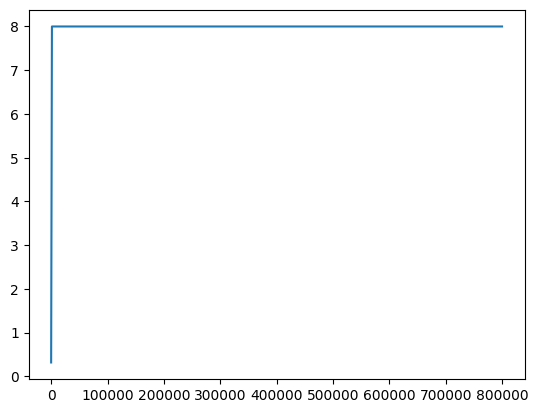

In [3]:
plt.plot(data["Generation"], data["BestEval"])
plt.show()

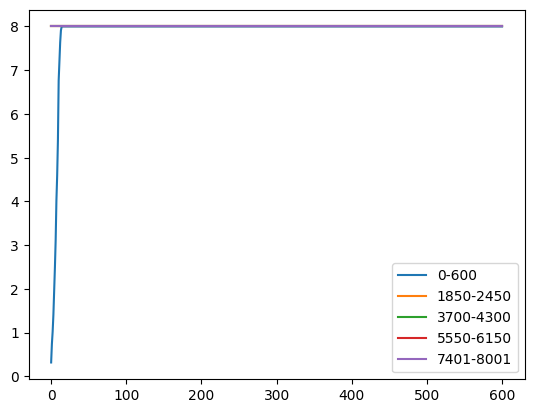

In [4]:
width = 600
graph_num = 5
graph_points = np.linspace(0, len(data["Generation"])-width, graph_num)
for start in graph_points:
    ys = data["BestEval"][int(start):int(start+width)]
    xs = np.linspace(0, len(ys), len(ys))
    plt.plot(xs, ys, label="%s-%s"%(int(start), int(start+width)))
plt.legend()
plt.show()

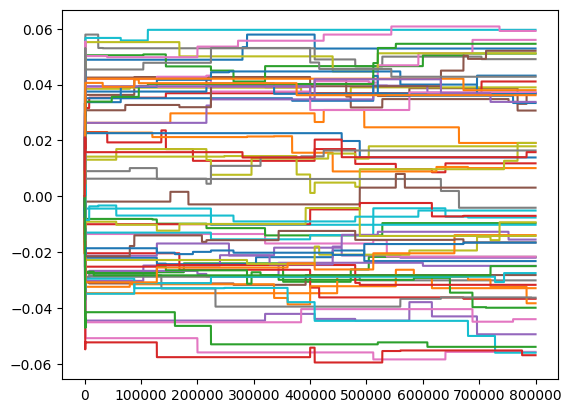

In [5]:
weights_seqs = [[] for _ in range(len(data["FlatWeights"][0]))]
for weights in data["FlatWeights"]:
    for i, w in enumerate(weights):
        weights_seqs[i].append(w)

for ws in weights_seqs:
    plt.plot(data["Generation"], ws)
plt.show()

In [7]:
ddf = pd.read_csv("imgs/d.csv")
ddf["Vals"] = ddf["Vals"].apply(lambda s: [float(si) for si in s.split(":")])
ddf.head()

,Id,Timestep,Vals
0,0,0,"[-0.341679, 0.908525, -0.414002, -0.705413, 0...."
1,0,1,"[-0.280311, 0.790601, -0.370797, -0.594721, 0...."
2,0,2,"[-0.21755, 0.696932, -0.342093, -0.512889, 0.0..."
3,0,3,"[-0.155852, 0.622938, -0.324434, -0.453678, -0..."
4,0,4,"[-0.096745, 0.564919, -0.315149, -0.412132, -0..."


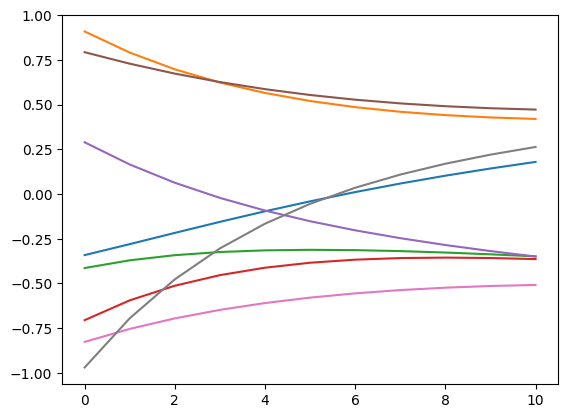

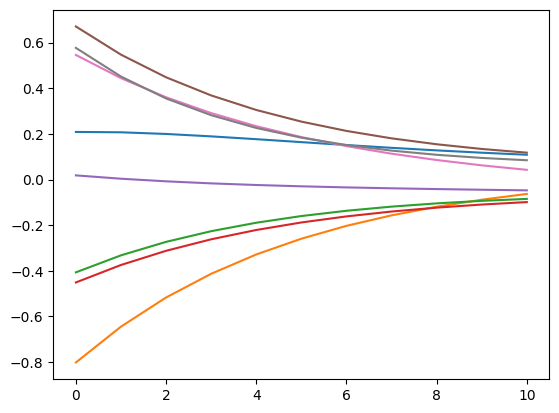

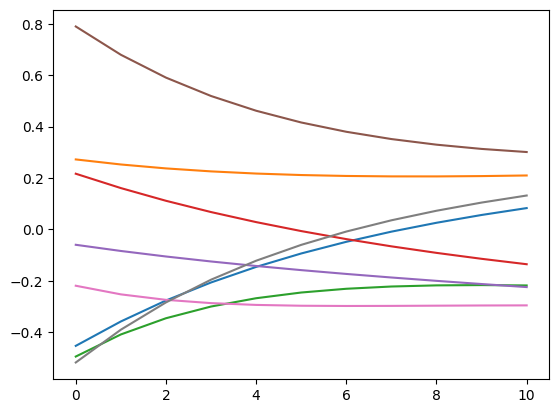

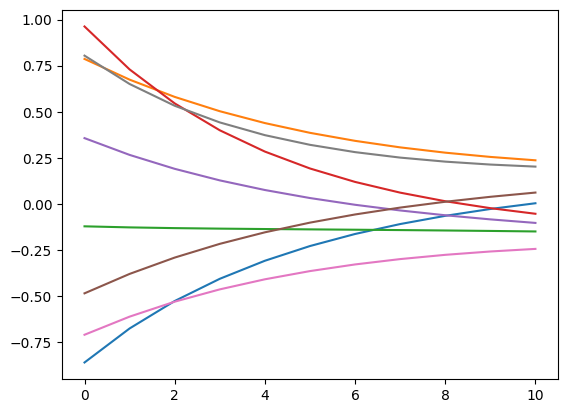

In [17]:
uids = list(ddf["Id"].unique())
fig, axs = plt.subplots(1, uids)
for id in uids:
    ddf_id = ddf[ddf["Id"] == id]
    num_vals = len(list(ddf_id["Vals"])[0])
    vals_seqs = [[] for _ in range(num_vals)]
    for vals in ddf_id["Vals"]:
        for i, v in enumerate(vals):
            vals_seqs[i].append(v)
    for vs in vals_seqs:
        plt.plot(ddf_id["Timestep"], vs)
    plt.show()